<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Numerical Integration 01

### About this notebook

In this notebook we present some of the numerical integration techniques.

---

One of the most common tasks in astrophysics is to evaluate integrals such as
\begin{equation}
I = \int_a^b f(x) dx ,
\end{equation}
and, in many cases, it can not be done analytically. The integrand may be given as an analytical function $f(x)$ or a discrete set of values $f(x_i)$ and we will describe the methods to evaluate numerically the integration in both cases. 
 
--- 
## Piecewise Interpolation and Quadratures

Any integration method which uses a weighted sum to evaluate numerically the integral is called a **quadrature rule**. Suppose that we know (or can evaluate) the integrand $f(x)$ at a finite set of **nodes**, $\{x_j\}$ with $j=0,\cdots,n$ in the interval $[a,b]$ and such that $x_0 = a$ and $x_n = b$. This gives a set of $n+1$ nodes or equivalently $n$ intervals. A discrete approximation of the integral of this function is given by the **rectangle rule**,
\begin{equation}
I = \int_a^b f(x) dx \approx  \Delta x \sum_{i=0}^{n-1} f(x_i),
\end{equation}
where the width of the intervals is $\Delta x = \frac{b-a}{n}$. It is clear, from the definition of an integral, that this approximation converges to the real integral when $n\rightarrow \infty$, i.e. when $\Delta x \rightarrow 0$. Although the rectangle rule may give a good approximation to the integral, it can be improved by using an interpolated function in each interval. These methods involving interpolation of polynomials are called, in general, **Newton-Cotes quadratures**

---
### Midpoint Rule

The simplest modification to the rectangle rule described above is to use the central value of the function $f(x)$ in each interval instead of a value at one of the nodes. Hence, if it is possible to evaluate the integrand at the midpoint of each interval, the approximation of the integral is given by
\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum _{i=0}^{n-1} (x_{i+1} - x_i)  f(\bar{x}_i ),
\end{equation}
where $\bar{x}_i = \frac{x_i + x_{i+1}}{2}$ is the midpoint of the interval $[x_i, x_{i+1}]$.

In order to estimate the error associated with this method, we use a Taylor expansion of the integrand in an interval $[x_i, x_{i+1}]$ about its midpoint $\bar{x}_i$,
\begin{equation}
f(x) = f(\bar{x}_i) + f'(\bar{x}_i)(x-\bar{x}_i) + \frac{f''(\bar{x}_i)}{2}(x-\bar{x}_i)^2 + \frac{f'''(\bar{x}_i)}{6}(x-\bar{x}_i)^3 + ...
\end{equation}

Integrating this expression from $x_i$ to $x_{i+1}$, and noting that the odd-order terms vanish, we get
\begin{equation}
\int_{x_i}^{x_{i+1}} f(x)dx = f(\bar{x}_i)(x_{i+1}-x_i) + \frac{f''(\bar{x}_i)}{24}(x_{i+1}-x_i)^3 + ...
\end{equation}

This expansion shows that the error induced by the approximation in each interval is of the order of $\varepsilon_i =  (x_{i+1}-x_i)^3$. Since the total integral is obtained as a sum of $n$ integrals like this one, the total error is of the order of $\varepsilon = n \varepsilon_i $. 

When the nodes are equally spaced, we can write the size of the intervals as the constant  $h = \frac{b - a}{n}$ and therefore, the error associated with each interval is $\varepsilon_i =\frac{(b - a)^3}{n^3} = h^3$, while the total error of the quadrature is $\varepsilon = n \varepsilon_i = \frac{(b - a)^3}{n^2} = nh^3$.

#### Example. Integration with the midpoint rule.

We will read a data set from a .txt file and numerically integrate using the midpoint rule. Since the function is given as data points (and not as an analytical function), we cannot evaluate its value at the midppoint. Therefore, we will use the value of the function at the first point in each interval to calcualte the partial sums.

In [1]:
path = ''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/CA2021/15. Integration/presentation/'


Mounted at /content/drive


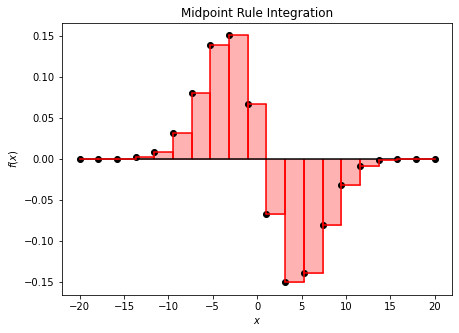

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = 5.01388e-06


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt(path+'data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)


plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    Integral = Integral + h*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Midpoint Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

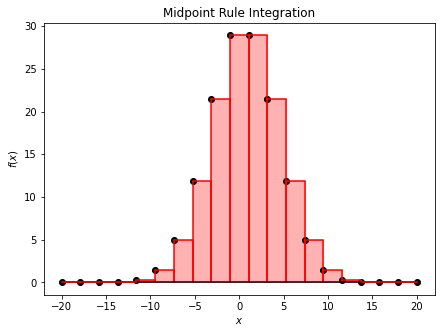

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = 2.91244e+02


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt(path+'data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)


plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    Integral = Integral + h*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Midpoint Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

---
### Trapezoidal Rule

The next generalization of the rectangle rule is to approximate $f(x)$ with a linear polynomial on each interval.  This is known as the **trapezoidal rule** and the corresponding quadrature is given by

\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum _{i=0}^{n-1} \frac{1}{2} (x_{i+1} - x_i)  \left[ f(x_{i+1}) + f(x_i) \right] .
\end{equation}

Contrary to the midpoint rule, this method doesn't need to evaluate the integrand in the midpoint, but only needs its values at the nodes. 


#### Example. Integration with the trapezoidal rule.

We will read a data set from a .txt file and numerically integrate using the trapezoidal rule. 

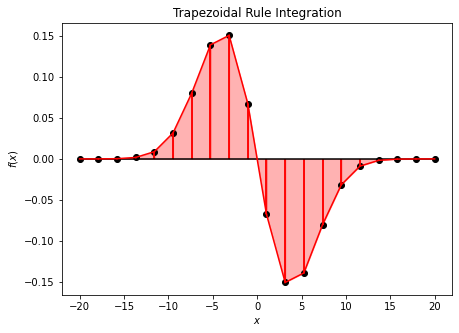

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = -7.87808e-17


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt(path+'data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + h*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Trapezoidal Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

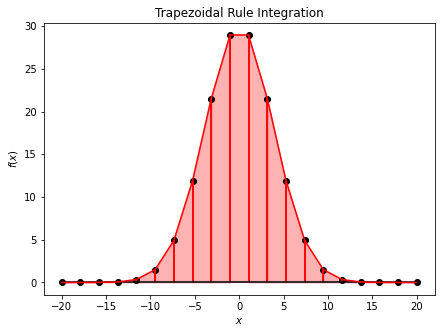

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = 2.91244e+02


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt(path+'data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N-1):
    h = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + h*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Trapezoidal Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

---
## Simpson's Rule

Simpson's Rule is a method that estimates the integral of a function $f(x)$ by approximating it as a second order polynomial in each interval. 

If we have three known values of the function $f_1 =f(x_1)$, $f_2 =f(x_2)$ and $f_3 =f(x_3)$ at the points $x_1 < x_2 < x_3$, we fit a second order polynomial with the form 
\begin{equation}
p_2 (x) = A (x-x_1)^2 + B (x-x_1) + C .
\end{equation} 

Integrating this polynomial in the interval $[x_1 , x_3]$, we obtain the value
\begin{equation}
\int_{x_1}^{x^3} p_2 (x) dx = \frac{x_3 - x_1}{6} \left( f_1 + 4f_2 + f_3 \right) + \mathcal{O} \left( (x_3 - x_1)^5 \right)
\end{equation}

---
### Simpson's Rule with evenly spaced points

If there are $N$ evenly spaced nodes in the integration interval, or equivalently $n=N-1$ intervals with constant width $h$, the total integral by Simpson's rule is writen

\begin{equation}
I = \int_a^b f(x) dx \approx \frac{h}{3} \sum_{i=0}^{\frac{n-2}{2}} \left[ f(x_{2i}) + 4f(x_{2i+1}) + f(x_{2i+2}) \right] .
\end{equation}

The numerical error in each interval is of the order of $h^5$ and therefore, the total integral will have an error of the order of $n h^5 = \frac{(a-b)^5}{n^4}$.

#### Example. Integration with the Simpson's rule.

We will read a data set from a .txt file and numerically integrate using Simpson's rule. 

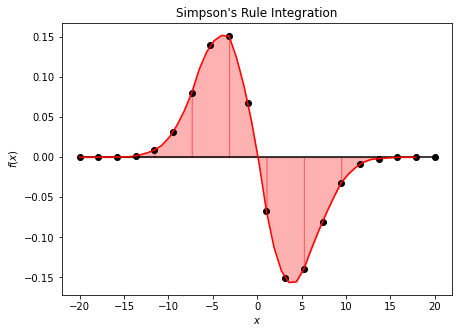

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = 2.24796e-05


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt(path+'data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)
n = N-1

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h = x[2*i+1] -x[2*i] 
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson\'s Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

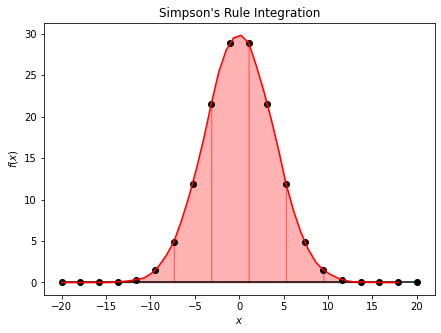

The result of the numerical integration of the discretely-sampled function
between x = -20.0 and x = 20.0 is I = 2.91243e+02


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt(path+'data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

N = len(x)
n = N-1

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(int((n-2)/2 +1)):
    h =  x[2*i+1] - x[2*i]
    Integral = Integral + h*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson\'s Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration of the discretely-sampled function')
print(f'between x = {x[0]:.1f} and x = {x[len(x)-1]:.1f} is I = {Integral:.5e}')

---
### Simpson's Rule for non-equally spaced data

When the known nodes of $f(x)$ are non-equally spaced, the Simpson's rule must be modified to be

\begin{equation}
I = \int_a^b f(x) dx \approx \sum_{i=0}^{\frac{n-2}{2}} \left[ \alpha f(x_{2i}) + \beta f(x_{2i+1}) +\gamma f(x_{2i+2}) \right] 
\end{equation}
where
\begin{align}
\alpha = &\frac{-h_{2i+1}^2 + h_{2i+1} h_{2i} + 2 h_{2i}^2}{6 h_{2i}}   \\
\beta = &\frac{ (h_{2i+1} + h_{2i})^3 }{6 h_{2i+1} h_{2i}} \\
\gamma =&  \frac{2 h_{2i+1}^2 + h_{2i+1} h_{2i} - h_{2i}^2}{6 h_{2i+1}}
\end{align}
and $h_j = x_{j+1} - x_j$.